In [1]:
from summarizer.domain.model.video import Video
import matplotlib

2022-03-22 19:53:37.101863: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-03-22 19:53:37.102040: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


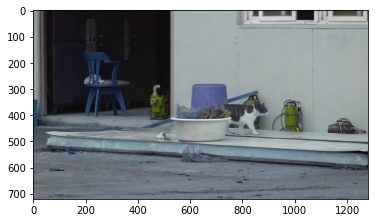

In [2]:
video = Video(url="tests/1.mp4")
images = video._read_video()
image = images.__next__()
matplotlib.pyplot.imshow(image.frame)

In [3]:

features = image.extract()
print(features)

2022-03-22 19:53:43.751531: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


[Feature(current_frame=0, name='chair', percentage_probability=97.34295010566711, box_points=[191, 180, 362, 420]), Feature(current_frame=0, name='cat', percentage_probability=95.23227214813232, box_points=[722, 354, 899, 504]), Feature(current_frame=0, name='bowl', percentage_probability=39.52984809875488, box_points=[535, 406, 756, 527])]


In [ ]:
feature_array = video.extract_feature()
print(feature_array)